### Introduction

In this part of the analysis, we build upon the clustering results obtained in the first step, where we identified groups using the best-performing clustering method for this dataset. We then compared two algorithms, Random Forest and Gradient Boosting, to develop an effective classification algorithm capable of assigning individuals to the identified groups based on their responses. Random Forest was chosen for its robustness, interpretability, and ability to handle diverse data types, while Gradient Boosting was selected for its strong predictive performance and capacity to capture non-linear relationships. Finally, we optimized the number of questions used in the classification process by analyzing feature importance and iteratively reducing the feature set to achieve the best trade-off between performance and simplicity. This step ensures that the resulting algorithm remains both efficient and accurate, providing a practical solution for future use with minimal inputs.

## IMPORT ##

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

## Data Loading ##

In [2]:
# Load the data
file_path = "fic_epita_kantar_codes.csv"
data_codes = pd.read_csv(file_path, sep=';')

In [3]:
# Select relevant columns
columns_of_interest = [
    "A9_1_slice", "A9_2_slice", "A9_3_slice", "A9_4_slice", "A9_5_slice",
    "A9_6_slice", "A9_7_slice", "A9_8_slice", "A9_9_slice", "A9_10_slice",
    "A9_11_slice", "A9_12_slice", "A9_13_slice", "A9_14_slice", "A9_15_slice",
    "A9_16_slice", "A10_1_slice", "A10_2_slice", "A10_3_slice", "A10_4_slice",
    "A10_5_slice", "A10_6_slice", "A10_7_slice", "A10_8_slice",
    "A11_1_slice", "A11_2_slice", "A11_3_slice", "A11_4_slice", "A11_5_slice",
    "A11_6_slice", "A11_7_slice", "A11_8_slice", "A11_9_slice", "A11_10_slice",
    "A11_11_slice", "A11_12_slice", "A11_13_slice"
]
subset_data = data_codes[columns_of_interest]

## Adding the cluster column using the best algo with the best number of cluster found in part 1 ##

In [4]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_data.fillna(0))  # Replace missing values

# Perform spectral clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(scaled_data)

# Add cluster labels to the data
subset_data['cluster'] = spectral_labels


/tmp/ipykernel_148922/1069035997.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['cluster'] = spectral_labels


## Training Random Forest ##

In [5]:
# Define features (golden questions) and target (clusters)
X = subset_data.drop(columns=['cluster'])
y = subset_data['cluster']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.98      0.98      0.98       764
           2       0.95      0.94      0.94       223

    accuracy                           0.97      1000
   macro avg       0.97      0.90      0.93      1000
weighted avg       0.97      0.97      0.97      1000



## Training Gradient Boosting ##

In [6]:
# Define features (questions) and target (clusters)
X2 = subset_data.drop(columns=['cluster'])
y2 = subset_data['cluster']

# Split into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train a Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train2, y_train2)

# Predict and evaluate
y_pred2 = gb.predict(X_test2)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.98      0.98      0.98       764
           2       0.95      0.94      0.94       223

    accuracy                           0.97      1000
   macro avg       0.97      0.90      0.93      1000
weighted avg       0.97      0.97      0.97      1000



## Getting the importance of each question ##

In [7]:
# FOR RANDOM FOREST
# Get feature importance
feature_importance = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (Top Questions) for Random Forest:\n", importance_df)


Feature Importance (Top Questions) for Random Forest:
          Feature  Importance
30   A11_7_slice    0.090382
28   A11_5_slice    0.083774
33  A11_10_slice    0.083164
26   A11_3_slice    0.070590
31   A11_8_slice    0.064725
20   A10_5_slice    0.056825
16   A10_1_slice    0.042247
34  A11_11_slice    0.040135
25   A11_2_slice    0.035924
24   A11_1_slice    0.034621
36  A11_13_slice    0.030029
32   A11_9_slice    0.029286
27   A11_4_slice    0.025217
7     A9_8_slice    0.020887
0     A9_1_slice    0.020676
2     A9_3_slice    0.018130
17   A10_2_slice    0.017833
3     A9_4_slice    0.017816
35  A11_12_slice    0.017118
1     A9_2_slice    0.016357
15   A9_16_slice    0.013947
22   A10_7_slice    0.013669
12   A9_13_slice    0.013149
13   A9_14_slice    0.012124
14   A9_15_slice    0.012015
23   A10_8_slice    0.011791
6     A9_7_slice    0.011791
29   A11_6_slice    0.011472
9    A9_10_slice    0.010386
11   A9_12_slice    0.010209
21   A10_6_slice    0.010157
10   A9_11_slice 

In [8]:
# FOR Gradiant Boosting
# Get feature importance
feature_importance2 = gb.feature_importances_
importance_df2 = pd.DataFrame({
    'Feature': X2.columns,
    'Importance': feature_importance2
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (Top Questions) for Gradiant Boosting:\n", importance_df2)


Feature Importance (Top Questions) for Gradiant Boosting:
          Feature  Importance
30   A11_7_slice    0.202889
28   A11_5_slice    0.130931
26   A11_3_slice    0.113335
31   A11_8_slice    0.078899
20   A10_5_slice    0.051268
16   A10_1_slice    0.048668
33  A11_10_slice    0.043213
25   A11_2_slice    0.037185
0     A9_1_slice    0.033521
36  A11_13_slice    0.030084
34  A11_11_slice    0.026607
3     A9_4_slice    0.023437
27   A11_4_slice    0.022400
7     A9_8_slice    0.021668
24   A11_1_slice    0.018486
35  A11_12_slice    0.015559
1     A9_2_slice    0.011569
32   A11_9_slice    0.011380
2     A9_3_slice    0.010143
9    A9_10_slice    0.009577
29   A11_6_slice    0.006769
19   A10_4_slice    0.006347
12   A9_13_slice    0.006133
13   A9_14_slice    0.005958
17   A10_2_slice    0.005570
15   A9_16_slice    0.003970
23   A10_8_slice    0.003879
11   A9_12_slice    0.003572
14   A9_15_slice    0.003558
22   A10_7_slice    0.002961
8     A9_9_slice    0.002431
5     A9_6_sl

## Finding performance when lowering question amount ##

In [9]:
# FOR RANDOM FOREST
# Evaluate performance with fewer features
results = []
for i in range(1, len(importance_df) + 1):
    top_features = importance_df['Feature'].head(i)
    X_train_reduced = X_train[top_features]
    X_test_reduced = X_test[top_features]
    
    rf_reduced = RandomForestClassifier(random_state=42)
    rf_reduced.fit(X_train_reduced, y_train)
    y_pred_reduced = rf_reduced.predict(X_test_reduced)
    
    acc = accuracy_score(y_test, y_pred_reduced)
    results.append({'Num_Features': i, 'Accuracy': acc})

# Display results
results_df = pd.DataFrame(results)
print(results_df)


    Num_Features  Accuracy
0              1     0.851
1              2     0.878
2              3     0.880
3              4     0.900
4              5     0.896
5              6     0.908
6              7     0.913
7              8     0.913
8              9     0.925
9             10     0.925
10            11     0.920
11            12     0.925
12            13     0.932
13            14     0.933
14            15     0.939
15            16     0.947
16            17     0.950
17            18     0.957
18            19     0.956
19            20     0.959
20            21     0.956
21            22     0.960
22            23     0.957
23            24     0.961
24            25     0.958
25            26     0.962
26            27     0.968
27            28     0.962
28            29     0.966
29            30     0.962
30            31     0.962
31            32     0.970
32            33     0.963
33            34     0.966
34            35     0.968
35            36     0.971
3

In [10]:
# FOR Gradiant Boosting
# Evaluate performance with fewer features
results2 = []
for i in range(1, len(importance_df2) + 1):
    top_features2 = importance_df2['Feature'].head(i)
    X_train_reduced2 = X_train2[top_features2]
    X_test_reduced2 = X_test2[top_features2]
    
    gb_reduced = GradientBoostingClassifier(random_state=42)
    gb_reduced.fit(X_train_reduced2, y_train2)
    y_pred_reduced2 = gb_reduced.predict(X_test_reduced2)
    
    acc = accuracy_score(y_test2, y_pred_reduced2)
    results2.append({'Num_Features': i, 'Accuracy': acc})

# Display results
results_df2 = pd.DataFrame(results2)
print(results_df2)


    Num_Features  Accuracy
0              1     0.851
1              2     0.878
2              3     0.887
3              4     0.893
4              5     0.899
5              6     0.901
6              7     0.911
7              8     0.911
8              9     0.932
9             10     0.932
10            11     0.944
11            12     0.940
12            13     0.946
13            14     0.952
14            15     0.943
15            16     0.948
16            17     0.953
17            18     0.953
18            19     0.947
19            20     0.954
20            21     0.952
21            22     0.953
22            23     0.956
23            24     0.955
24            25     0.953
25            26     0.955
26            27     0.957
27            28     0.956
28            29     0.958
29            30     0.957
30            31     0.962
31            32     0.961
32            33     0.960
33            34     0.965
34            35     0.965
35            36     0.970
3

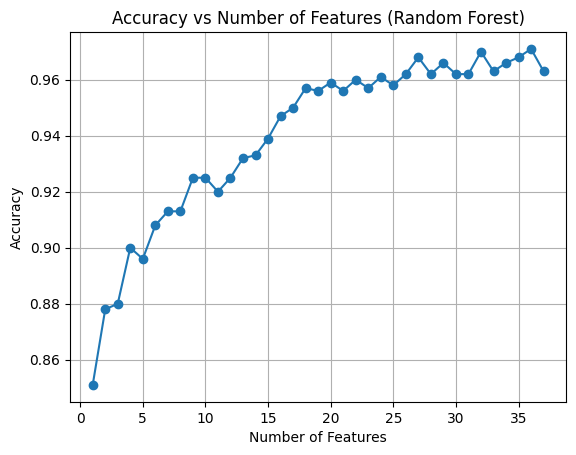

In [11]:
plt.plot(results_df['Num_Features'], results_df['Accuracy'], marker='o')
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Features (Random Forest)")
plt.grid()
plt.show()


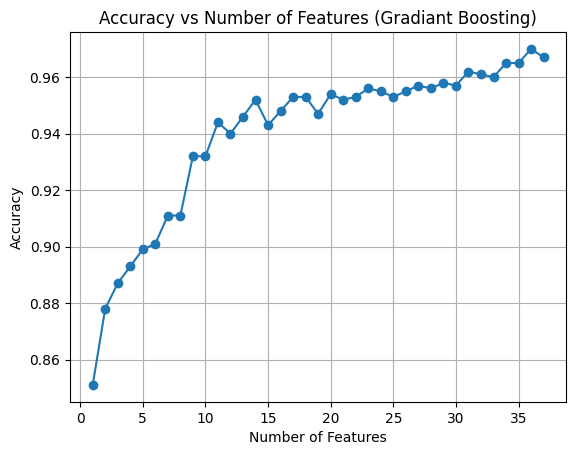

In [12]:
plt.plot(results_df2['Num_Features'], results_df2['Accuracy'], marker='o')
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Features (Gradiant Boosting)")
plt.grid()
plt.show()


### Conclusion

Both Random Forest and Gradient Boosting are similarly effective, with Gradient Boosting being slightly better in terms of accuracy. Therefore, the optimal choice is Gradient Boosting.

Using 14 features results in an accuracy of 95.2%, striking the best balance between performance and complexity. Beyond 14 features, the improvements in accuracy become minimal, and the model starts to slow down, making 14 features the optimal choice for maximizing classification performance while maintaining efficiency.